Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#6 Assignment - Centralities

# Node centrality assignment
For this assignment we will be exploring node centrality in an effort to get an intuitive feel for what the various centrality metrics tell us about the nodes in the graph. For this assignment we will be using the [Dolphin social network](http://www-personal.umich.edu/~mejn/netdata/dolphins.zip). Download the graph and load it as a networkx graph using the [networkx functions](https://networkx.github.io/documentation/networkx-2.0/reference/readwrite/gml.html). If you have any difficulty loading in a graph you can attempt to load it into Gephi and then save it as a .net (pajek) and then load that version into networkx.

In [6]:
import networkx as nx

#### Notes:
- I had difficulty loading the GML file, so it was converted to Pajet (.net) as advised.
- The *Pajek* graph saved by Gephi and loaded by NetworkX is a `MultiGraph`
- NetworkX defines a MultiGraph as: "Undirected graphs with self loops and parallel edges"
- Eigenvector Centrality cannot be computed by NetworkX on a `MultiGraph`
- A quick inspection of the graph in Gephi reveals it is a undirected graph, but did not observe any self loops or parallel edges
- The `MultiGraph` is converted to a `Graph` so we can compute all of the centrality measures

In [7]:
# Load your graph
MG = nx.read_pajek("dolphins.net")
G = nx.Graph(MG)

In [8]:
print(nx.info(MG))

Name: 
Type: MultiGraph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290


In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290


## Centrality in Networkx
Networkx has several functions available for calculating the centralities of the nodes in the graph. There are functions for [eigenvector](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html), [katz](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html), [closeness](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality), [betweenness](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality), [degree](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality), etc. For a full list you can visit the [documentation page](https://networkx.github.io/documentation/networkx-2.0/reference/algorithms/centrality.html). The functions take a graph as an argument and return a dictionary with nodes as keys and the centrality as values. This is convenient for us because we can set these as attributes for the nodes in the graph using the [`set_node_attributes`](https://networkx.github.io/documentation/networkx-2.0/reference/generated/networkx.classes.function.set_node_attributes.html) function. For example:

In [10]:
import networkx as nx

In [11]:
my_graph = nx.erdos_renyi_graph(500, 0.3)

In [12]:
# Get the eigenvector centralities for all the nodes
centralities = nx.eigenvector_centrality(my_graph)

In [13]:
for i in range(5):
    print("node:",i,"=",centralities[i])

node: 0 = 0.04353494295682359
node: 1 = 0.04412090908525219
node: 2 = 0.045543562534920014
node: 3 = 0.045656652886911266
node: 4 = 0.04841431274293137


calling the NetworkX function `set_node_attributes()` threw an exception, claiming the 'dict' was not hashable...

In [14]:
# Set the attributes of the nodes to include the centralities
# The arguments are: <graph> <values> <attribute key>
# Where <values> is a dictionary with keys=nodes
nx.set_node_attributes(my_graph,centralities,"eigenvector")

TypeError: unhashable type: 'dict'

so, here I manually loop over the centralities and set the attribute

In [15]:
attribute = "eigenvector"
for node, value in centralities.items():
    my_graph.node[node][attribute] = value

In [16]:
# Now we can refer to the node's attributes in the graph
print(my_graph.node[3]["eigenvector"])

0.045656652886911266


now, compute the colleciton of centrality measures for the Dolphin network and add node attributes with the values

In [17]:
'''
addNodeAttributes(graph, values, attribute)
'''
def addNodeAttributes(graph, values, attribute):
    for node, value in values.items():
        graph.node[node][attribute] = value

In [18]:
def getCentralities(graph, f):
    return f(graph)

In [19]:
def enrichGraph(graph, f, name):
    centralities = getCentralities(graph, f)
    addNodeAttributes(graph, centralities, name)

In [20]:
enrichments = {
    "degree": nx.degree_centrality,
    "eigenvector": nx.eigenvector_centrality,
    "closeness": nx.closeness_centrality,
    "harmonic": nx.harmonic_centrality,
    "betweenness": nx.betweenness_centrality,
    "katz": nx.katz_centrality
}

In [21]:
for name, function in enrichments.items():
    print("Enriching graph nodes with centrality measure:",name)
    enrichGraph(G, function, name)

Enriching graph nodes with centrality measure: degree
Enriching graph nodes with centrality measure: closeness
Enriching graph nodes with centrality measure: eigenvector
Enriching graph nodes with centrality measure: katz
Enriching graph nodes with centrality measure: harmonic
Enriching graph nodes with centrality measure: betweenness


In [22]:
G.node['Beak']

{'betweenness': 0.019082596213743756,
 'closeness': 0.3465909090909091,
 'degree': 0.09836065573770492,
 'eigenvector': 0.12850351952918207,
 'harmonic': 25.983333333333327,
 'id': '1',
 'katz': 0.13527614731116458,
 'shape': '0.0',
 'x': -85.40187,
 'y': 351.36813}

save the enriched graph in `gexf` format for further analysis in Gephi

In [23]:
nx.write_gexf(G,"dolphins.gexf")

## Analysis Assignment

We want to do this so that we can export our graph as a `gexf` file using networkx's [`write_gexf`](https://networkx.github.io/documentation/networkx-2.0/reference/readwrite/gexf.html) function. Gexf is able to contain a lot more information than other graph datatypes like pajek. It can contain information about the node attributes or edge attributes that belong to the graph and then these attributes will be recognized by Gephi for plotting.

Once the graph is saved and you open it in Gephi, you can use the node (or edge) attributes to control node (or edge) size and color. This can be done by clicking the refresh button by the drop-down menu for node/edge sizing and coloring (refer back to the Gephi tutorial if you are unfamiliar with this). Your attributes will be loaded in using whatever name you used as an `<attribute key>`

Choose a visually appealing layout and then arrange your nodes accordingly and then save separate visualizations that only change the node color/size according to your saved attributes. You will be using this ability for the following questions.

**What to submit**: Turn in a PDF that contains your short responses and the visualizations for each of the following questions. **Keep the node location the same** for your graph visualizations.

## Picking the right Dolphins
Answer the following questions:

#### Notes on the network layout
I wanted the visualization of the network to be uniformly distributed in a fixed area. The Wikipedia image which shows six views of the same network with different centrality measures was really well put together. My objective was either a square or circle presentation of the Dolphin network.

I used the *Fruchterman Reingold* layout algorithm with the following settings:
```
Area: 25.0
Gravity: 10.0
Speed: 1.0
```

This produced a nice, well spaced circular layout. I applied the *Noverlap* algorithm to eliminate any overlapping nodes. 

The size of each nodes is based on **degree**, with a minimum size of 8.0 and a maximum size of 18.0. The nodes are colored using a Blue -> Yellow -> Red spectrum, and the value of each centrality measure (per the questions below).

#### (1) Popularity contest
We want to know who the top dolphins are in the network, the real centers of attraction. Using what you learned about centrality from the readings and videos, choose an appropriate centrality measure that will tell us who those dolphins are. Justify your decision and list who the important dolphins are.

#### Answer
Given that the objective is to show *popularity*, I considered centrality measures which emphasize a node's connectivity. To get this effect, we look at the measures based on **degree**. I evaluated *Degree Centrality* and *Eigenvector Centrality*, and ultimately chose Eigenvector because of its global perspective. Degree centrality is a local measure, and the question here really asks to show "top dolphins in the network" not in smaller local pockets.

#### Centrality measure used: 
- Eigenvector Centrality

#### Important "Popular" Dolphins:
- Grin
- SN4
- Topless
- Scabs

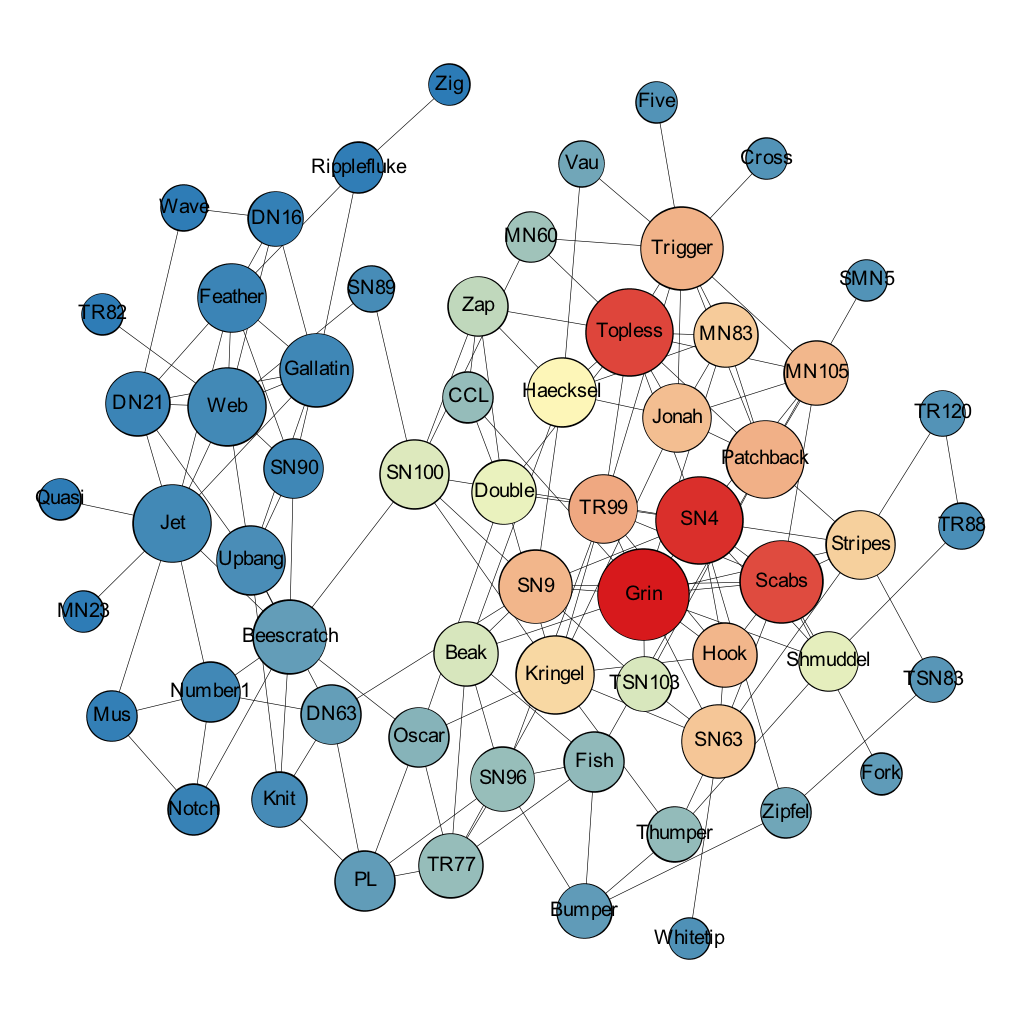

In [24]:
from IPython.display import Image
Image(filename="dolphin-1-popularity.png")

#### (2) Relay
Dolphins like passing information around efficiently along the shortest-paths. Among their neighbors who are the most important message relayers in the network? Justify your centrality choice for finding these dolphins.

#### Answer
Effective information passing is all about shortest paths. The nodes with the greatest accumulation of shortest paths are the best poised to influence the network most quickly, and thus are best for relaying information. 

#### Centrality measure used:
- Closeness Centrality

#### Most Important Dolphins:
- SN100
- SN9
- SN4
- Kringel

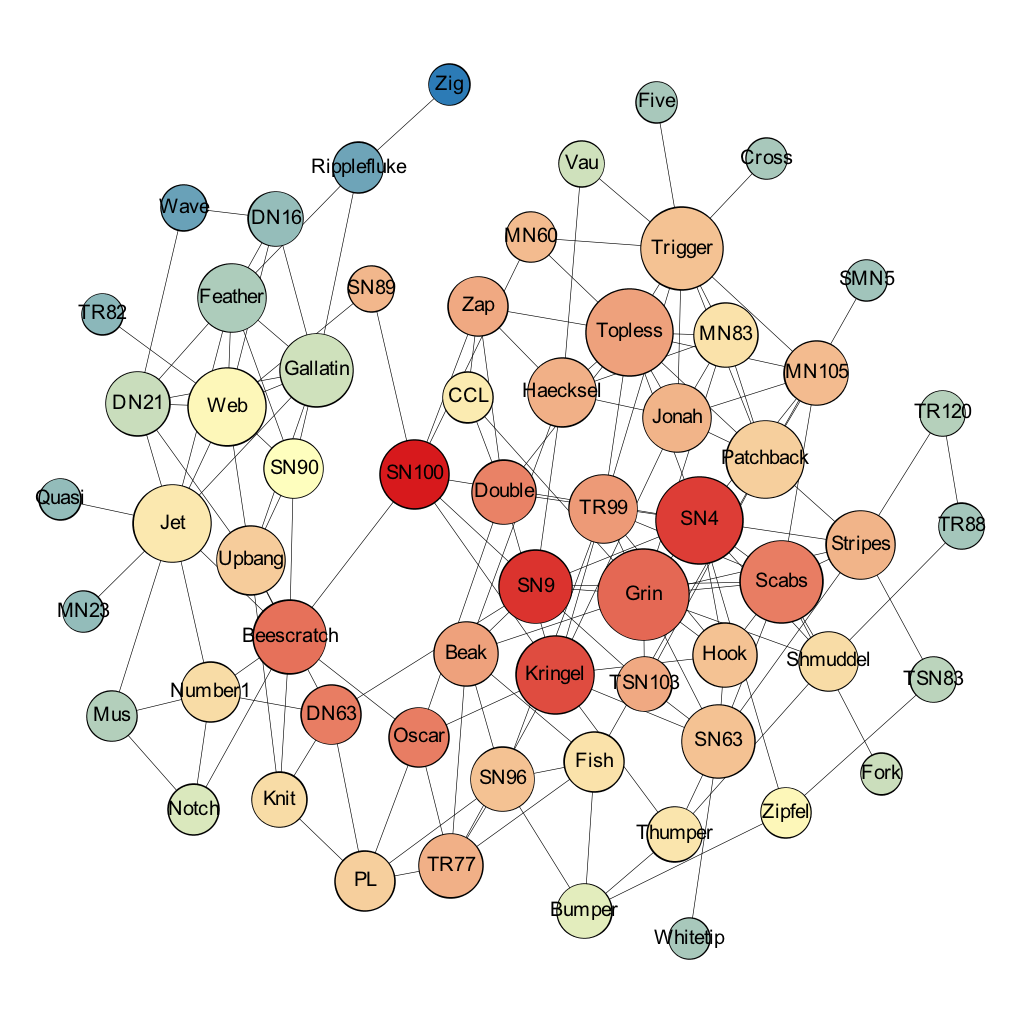

In [25]:
from IPython.display import Image
Image(filename="dolphin-2-relay.png")

#### (3) Gossip 
There is a lot smack going around the pod and everyone wants to know if Flipper will be inviting them to the party next week. But gossip takes time to travel. Which dolphins are in the best position for getting all the best gossip from around the pod? Justify your centrality choice for finding these dolphins.

#### Answer
Influencing the eventual flow of information around the network requires a special kind of connectivity. This is not necessarily about high-connectivity, but rather more about a connectivity which bridges gaps and affords flow between connected components.

#### Centrality measure used: 
- Betweenness Centrality

#### Best Positioned Dolphins:
- SN100
- Beescratch

#### And to a lesser degree, these are also important:
- SN9
- SN4

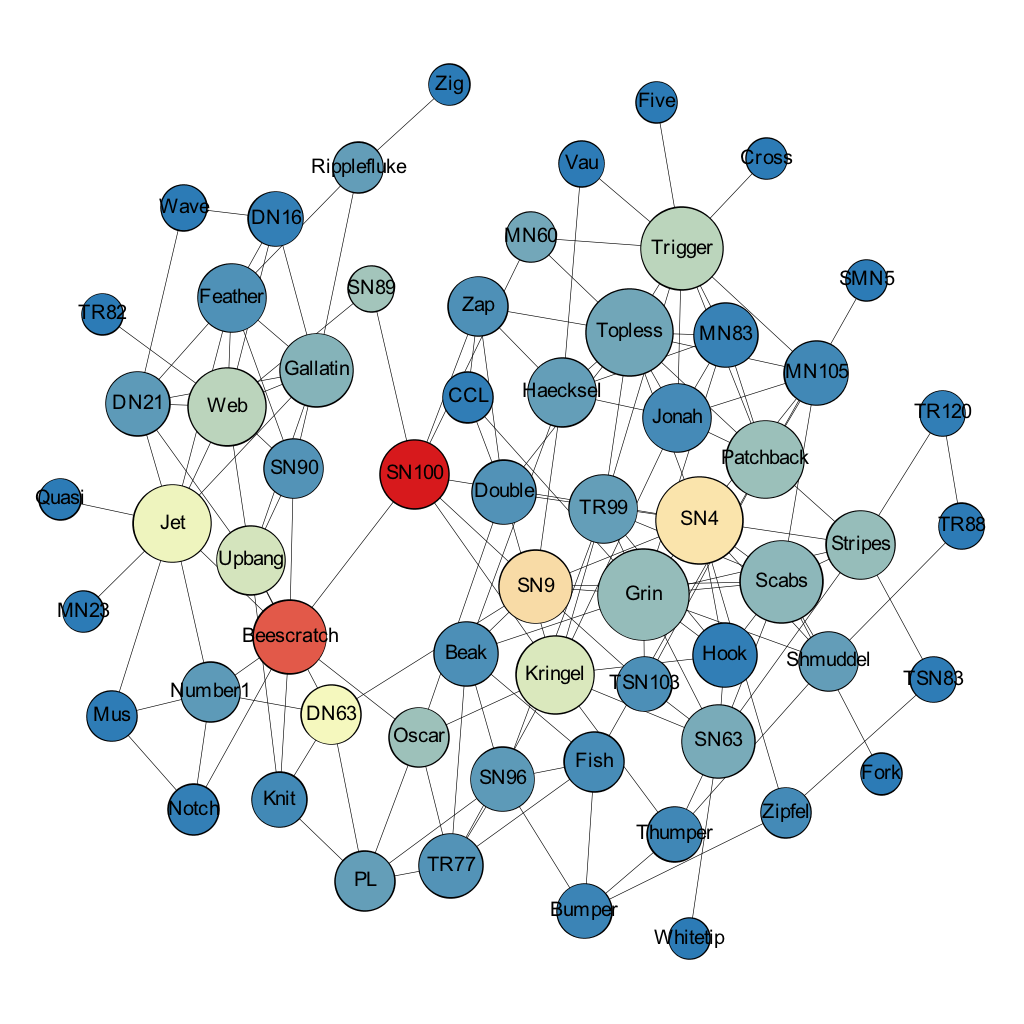

In [26]:
from IPython.display import Image
Image(filename="dolphin-3-gossip.png")